# Multi-Agent Real Estate System - Graph Visualization

This notebook visualizes the flow and structure of the multi-agent real estate system.


In [1]:
import os
from dotenv import load_dotenv
from agent import build_graph
from langgraph.checkpoint.memory import InMemorySaver

load_dotenv()


True

## Build the Graph


In [6]:
# Build the graph
memory = InMemorySaver()
graph = build_graph(checkpointer=memory)

print("Graph built successfully!")


Graph built successfully!


Logfire project URL: ]8;id=537648;https://logfire-us.pydantic.dev/gershblocks/phonenix-agent\https://logfire-us.pydantic.dev/gershblocks/phonenix-agent]8;;\


## Visualize the Graph Structure


In [7]:
# Get the graph structure
print("\n=== Graph Nodes ===")
for node in graph.nodes:
    print(f"  - {node}")

print("\n=== Graph Edges ===")
print(graph.edges)



=== Graph Nodes ===
  - __start__
  - router
  - lead_qualification
  - property_search
  - property_details
  - scheduling
  - market_analysis
  - faq
  - general

=== Graph Edges ===


AttributeError: 'CompiledStateGraph' object has no attribute 'edges'

## Generate Graph Visualization (Mermaid Diagram)


In [8]:
# Generate Mermaid diagram
try:
    mermaid_diagram = graph.get_graph().draw_mermaid()
    print("Mermaid Diagram:")
    print("=" * 50)
    print(mermaid_diagram)
    print("=" * 50)
except Exception as e:
    print(f"Error generating Mermaid diagram: {e}")


Mermaid Diagram:
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	router(router)
	lead_qualification(lead_qualification)
	property_search(property_search)
	property_details(property_details)
	scheduling(scheduling)
	market_analysis(market_analysis)
	faq(faq)
	general(general)
	__end__([<p>__end__</p>]):::last
	__start__ --> router;
	router -.-> faq;
	router -.-> general;
	router -.-> lead_qualification;
	router -.-> market_analysis;
	router -.-> property_details;
	router -.-> property_search;
	router -.-> scheduling;
	faq --> __end__;
	general --> __end__;
	lead_qualification --> __end__;
	market_analysis --> __end__;
	property_details --> __end__;
	property_search --> __end__;
	scheduling --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



## Visualize with Graphviz (if available)


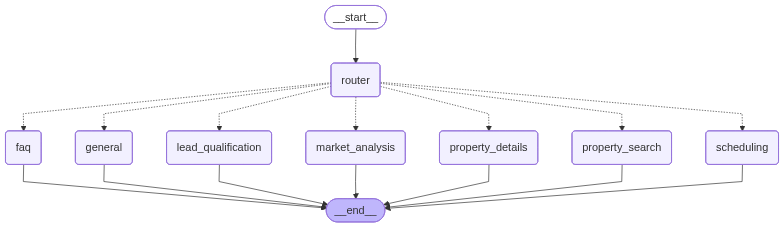

In [9]:
try:
    from IPython.display import Image, display
    import graphviz
    
    # Get the graph structure
    graph_structure = graph.get_graph()
    
    # Draw the graph
    graph_image = graph_structure.draw_mermaid_png()
    
    # Display the image
    display(Image(graph_image))
    
except ImportError:
    print("Graphviz or IPython not available. Install with: pip install graphviz ipython")
except Exception as e:
    print(f"Error generating graph image: {e}")
    print("\nTrying alternative visualization method...")
    
    # Alternative: Print ASCII representation
    try:
        print("\nGraph Structure (ASCII):")
        print("=" * 50)
        print(graph.get_graph().print_ascii())
    except Exception as e2:
        print(f"Error with ASCII visualization: {e2}")


## Detailed Node Information


In [10]:
# Print detailed information about each node
print("\n=== Detailed Node Information ===\n")

node_descriptions = {
    "router": "Routes incoming messages to the appropriate specialized agent",
    "lead_qualification": "Qualifies new leads and gathers client requirements",
    "property_search": "Searches and filters properties based on criteria",
    "property_details": "Provides detailed information about specific properties",
    "scheduling": "Handles viewing appointments and scheduling",
    "market_analysis": "Provides market trends and financial calculations",
    "faq": "Answers general questions about the real estate process",
    "general": "Handles greetings and general conversation"
}

for node_name in graph.nodes:
    description = node_descriptions.get(node_name, "No description available")
    print(f"{node_name.upper()}")
    print(f"  Description: {description}")
    print()



=== Detailed Node Information ===

__START__
  Description: No description available

ROUTER
  Description: Routes incoming messages to the appropriate specialized agent

LEAD_QUALIFICATION
  Description: Qualifies new leads and gathers client requirements

PROPERTY_SEARCH
  Description: Searches and filters properties based on criteria

PROPERTY_DETAILS
  Description: Provides detailed information about specific properties

SCHEDULING
  Description: Handles viewing appointments and scheduling

MARKET_ANALYSIS
  Description: Provides market trends and financial calculations

FAQ
  Description: Answers general questions about the real estate process

GENERAL
  Description: Handles greetings and general conversation



## Flow Diagram (Text-based)


In [11]:
print("\n=== Message Flow Diagram ===\n")
print("""
START
  │
  ▼
ROUTER ──┐
         │
         ├──► lead_qualification ──► END
         ├──► property_search ──► END
         ├──► property_details ──► END
         ├──► scheduling ──► END
         ├──► market_analysis ──► END
         ├──► faq ──► END
         └──► general ──► END

Flow Explanation:
1. User message enters at START
2. Router analyzes the message and determines which agent should handle it
3. Message is routed to the appropriate specialized agent
4. Agent processes the message and returns a response
5. Flow ends at END
""")



=== Message Flow Diagram ===


START
  │
  ▼
ROUTER ──┐
         │
         ├──► lead_qualification ──► END
         ├──► property_search ──► END
         ├──► property_details ──► END
         ├──► scheduling ──► END
         ├──► market_analysis ──► END
         ├──► faq ──► END
         └──► general ──► END

Flow Explanation:
1. User message enters at START
2. Router analyzes the message and determines which agent should handle it
3. Message is routed to the appropriate specialized agent
4. Agent processes the message and returns a response
5. Flow ends at END



## Test the Graph with a Sample Message


In [12]:
import asyncio
from main import run_local_chat

# Test with a sample message
test_message = "What's the name of your company?"
test_number = "12345"

print(f"Testing with message: '{test_message}'\n")

async def test_flow():
    response = await run_local_chat(graph, test_message, test_number)
    print(f"\nResponse: {response}")

# Run the test
await test_flow()


Testing with message: 'What's the name of your company?'

15:17:31.273 Chat Completion with 'gpt-4o-mini' [LLM]
[Routing to: general]
15:17:48.130 Chat Completion with 'gpt-4o-mini' [LLM]
[general] Output type: <class 'str'>, Output: *Hello! I'm Frank, and I represent Phonenix Properties.* If you have any questions or need assistanc
[general] Successfully wrote output to stream
DEBUG: Added to collected_output: *Hello! I'm Frank, and I represent Phonenix Proper...

Response: *Hello! I'm Frank, and I represent Phonenix Properties.* If you have any questions or need assistance, feel free to ask!


## Export Graph to File (Optional)


In [13]:
# Save the graph visualization to a file
try:
    graph_structure = graph.get_graph()
    
    # Save as Mermaid diagram
    mermaid_diagram = graph_structure.draw_mermaid()
    with open("graph_flow.mmd", "w") as f:
        f.write(mermaid_diagram)
    print("Graph saved to graph_flow.mmd")
    
    # Try to save as PNG if possible
    try:
        graph_image = graph_structure.draw_mermaid_png()
        with open("graph_flow.png", "wb") as f:
            f.write(graph_image)
        print("Graph saved to graph_flow.png")
    except Exception as e:
        print(f"Could not save PNG (this is okay): {e}")
        
except Exception as e:
    print(f"Error saving graph: {e}")


Graph saved to graph_flow.mmd
Graph saved to graph_flow.png


## Agent Tools Overview


In [14]:
print("\n=== Available Tools by Agent ===\n")

agent_tools = {
    "lead_qualification": ["search_properties"],
    "property_search": ["search_properties", "get_property_details", "get_similar_properties"],
    "property_details": ["get_property_details", "estimate_property_value", "get_similar_properties"],
    "scheduling": ["schedule_viewing", "get_available_slots", "cancel_appointment", "get_client_appointments", "get_property_details"],
    "market_analysis": ["calculate_mortgage", "get_market_trends", "compare_properties"],
    "faq": [],
    "general": [],
    "router": []
}

for agent, tools in agent_tools.items():
    print(f"{agent.upper()}:")
    if tools:
        for tool in tools:
            print(f"  - {tool}")
    else:
        print("  (no tools)")
    print()



=== Available Tools by Agent ===

LEAD_QUALIFICATION:
  - search_properties

PROPERTY_SEARCH:
  - search_properties
  - get_property_details
  - get_similar_properties

PROPERTY_DETAILS:
  - get_property_details
  - estimate_property_value
  - get_similar_properties

SCHEDULING:
  - schedule_viewing
  - get_available_slots
  - cancel_appointment
  - get_client_appointments
  - get_property_details

MARKET_ANALYSIS:
  - calculate_mortgage
  - get_market_trends
  - compare_properties

FAQ:
  (no tools)

GENERAL:
  (no tools)

ROUTER:
  (no tools)



In [ ]:
from langchain_core.runnables import RunnableLambda


def add_one_number(x: int) -> int:import smtplib
import socket
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.utils import formataddr
from email import encoders
import re
import logging
import os
from typing import List, Optional, Dict, Any
from dataclasses import dataclass

logger = logging.getLogger(__name__)


@dataclass
class EmailConfig:
    """Configuration class for email settings"""

    smtp_server: str = "smtp.gmail.com"
    smtp_port: int = 587
    use_tls: bool = True
    timeout: int = 30
    sender_name: Optional[str] = None


class EmailSender:
    """
    A comprehensive email sending class with robust error handling.
    """

    def __init__(
        self, sender: str, password: str, config: Optional[EmailConfig] = None
    ):
        """
        Initialize the EmailSender.

        Args:
            sender: Default sender email address
            password: Email password or app password
            config: Email configuration (optional, defaults to Gmail settings)
        """
        self.sender = sender
        self.password = password
        self.config = config or EmailConfig()
        self.logger = logging.getLogger(f"{__name__}.{self.__class__.__name__}")

        # Validate sender email on initialization
        if not self._validate_email(sender):
            raise ValueError(f"Invalid sender email format: {sender}")

    @staticmethod
    def _validate_email(email: str) -> bool:
        """Validate email address format"""
        pattern = r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"
        return re.match(pattern, email) is not None

    def _validate_inputs(
        self, subject: str, body: str, recipients: List[str]
    ) -> Dict[str, Any]:
        """Validate all input parameters"""
        if not subject or not isinstance(subject, str):
            return {
                "success": False,
                "error": "Subject is required and must be a string",
            }

        if not body or not isinstance(body, str):
            return {"success": False, "error": "Body is required and must be a string"}

        if not recipients or not isinstance(recipients, list):
            return {"success": False, "error": "Recipients must be a non-empty list"}

        # Validate all recipient emails
        invalid_recipients = []
        for recipient in recipients:
            if not isinstance(recipient, str) or not self._validate_email(recipient):
                invalid_recipients.append(recipient)

        if invalid_recipients:
            return {
                "success": False,
                "error": f"Invalid recipient email format(s): {', '.join(map(str, invalid_recipients))}",
            }

        return {"success": True}

    def _create_message(
        self,
        subject: str,
        body: str,
        recipients: List[str],
        sender_name: Optional[str] = None,
    ) -> MIMEMultipart:
        """Create the email message"""
        msg = MIMEMultipart()
        msg["Subject"] = subject
        msg["To"] = ", ".join(recipients)

        # Set sender with optional display name
        display_name = sender_name or self.config.sender_name
        if display_name:
            msg["From"] = formataddr((display_name, self.sender))
        else:
            msg["From"] = self.sender

        # Attach body
        msg.attach(MIMEText(body, "plain"))

        return msg

    def _get_smtp_connection(self) -> smtplib.SMTP:
        """Establish SMTP connection based on configuration"""
        if self.config.use_tls:
            if self.config.smtp_port == 465:
                # SSL connection
                return smtplib.SMTP_SSL(
                    self.config.smtp_server,
                    self.config.smtp_port,
                    timeout=self.config.timeout,
                )
            else:
                # TLS connection
                server = smtplib.SMTP(
                    self.config.smtp_server,
                    self.config.smtp_port,
                    timeout=self.config.timeout,
                )
                server.starttls()
                return server
        else:
            # Plain connection (not recommended)
            return smtplib.SMTP(
                self.config.smtp_server,
                self.config.smtp_port,
                timeout=self.config.timeout,
            )

    def send_email(
        self,
        subject: str,
        body: str,
        recipients: List[str],
        sender_name: Optional[str] = None,
    ) -> Dict[str, Any]:
        """
        Send an email with comprehensive error handling.

        Args:
            subject: The subject line of the email
            body: The main content/body of the email
            recipients: List of email addresses to send to
            sender_name: Display name for sender (optional, overrides config)

        Returns:
            Dictionary with success status and message
        """
        # Input validation
        validation_result = self._validate_inputs(subject, body, recipients)
        if not validation_result["success"]:
            return validation_result

        # Remove duplicates while preserving order
        recipients = list(dict.fromkeys(recipients))

        try:
            # Create message
            msg = self._create_message(subject, body, recipients, sender_name)

            # Get SMTP connection
            server = self._get_smtp_connection()

            with server:
                # Login
                server.login(self.sender, self.password)

                # Send email
                failed_recipients = server.sendmail(
                    self.sender, recipients, msg.as_string()
                )

                # Check for failed recipients
                if failed_recipients:
                    return {
                        "success": False,
                        "error": f"Failed to send to some recipients: {failed_recipients}",
                    }

                self.logger.info(f"Email sent successfully to {recipients}")
                return {
                    "success": True,
                    "message": f"Email sent successfully to {len(recipients)} recipient(s): {', '.join(recipients)}",
                }

        except smtplib.SMTPAuthenticationError as e:
            error_msg = f"Authentication failed: {str(e)}. Check your email and password/app password."
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except smtplib.SMTPRecipientsRefused as e:
            error_msg = f"All recipients were refused: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except smtplib.SMTPSenderRefused as e:
            error_msg = f"Sender was refused: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except smtplib.SMTPDataError as e:
            error_msg = f"SMTP data error: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except smtplib.SMTPConnectError as e:
            error_msg = f"Failed to connect to SMTP server: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except smtplib.SMTPServerDisconnected as e:
            error_msg = f"SMTP server disconnected unexpectedly: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except smtplib.SMTPException as e:
            error_msg = f"SMTP error occurred: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except socket.timeout:
            error_msg = f"Connection timed out after {self.config.timeout} seconds"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except socket.gaierror as e:
            error_msg = f"DNS resolution failed for {self.config.smtp_server}: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except ConnectionRefusedError as e:
            error_msg = f"Connection refused by {self.config.smtp_server}:{self.config.smtp_port}: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

        except Exception as e:
            error_msg = f"Unexpected error occurred: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

    def send_html_email(
        self,
        subject: str,
        html_body: str,
        recipients: List[str],
        text_body: Optional[str] = None,
        sender_name: Optional[str] = None,
    ) -> Dict[str, Any]:
        """
        Send an HTML email with optional text fallback.

        Args:
            subject: The subject line of the email
            html_body: HTML content of the email
            recipients: List of email addresses to send to
            text_body: Plain text fallback (optional)
            sender_name: Display name for sender (optional)

        Returns:
            Dictionary with success status and message
        """
        # Input validation
        validation_result = self._validate_inputs(subject, html_body, recipients)
        if not validation_result["success"]:
            return validation_result

        # Remove duplicates while preserving order
        recipients = list(dict.fromkeys(recipients))

        try:
            # Create message
            msg = MIMEMultipart("alternative")
            msg["Subject"] = subject
            msg["To"] = ", ".join(recipients)

            # Set sender with optional display name
            display_name = sender_name or self.config.sender_name
            if display_name:
                msg["From"] = formataddr((display_name, self.sender))
            else:
                msg["From"] = self.sender

            # Attach text version if provided
            if text_body:
                msg.attach(MIMEText(text_body, "plain"))

            # Attach HTML version
            msg.attach(MIMEText(html_body, "html"))

            # Get SMTP connection and send
            server = self._get_smtp_connection()

            with server:
                server.login(self.sender, self.password)
                failed_recipients = server.sendmail(
                    self.sender, recipients, msg.as_string()
                )

                if failed_recipients:
                    return {
                        "success": False,
                        "error": f"Failed to send to some recipients: {failed_recipients}",
                    }

                self.logger.info(f"HTML email sent successfully to {recipients}")
                return {
                    "success": True,
                    "message": f"HTML email sent successfully to {len(recipients)} recipient(s): {', '.join(recipients)}",
                }

        except Exception as e:
            error_msg = f"Failed to send HTML email: {str(e)}"
            self.logger.error(error_msg)
            return {"success": False, "error": error_msg}

    def update_config(self, **kwargs):
        """Update email configuration"""
        for key, value in kwargs.items():
            if hasattr(self.config, key):
                setattr(self.config, key, value)
            else:
                raise ValueError(f"Invalid configuration key: {key}")

    def test_connection(self) -> Dict[str, Any]:
        """Test the SMTP connection and authentication"""
        try:
            server = self._get_smtp_connection()
            with server:
                server.login(self.sender, self.password)
                return {
                    "success": True,
                    "message": "Connection and authentication successful",
                }
        except Exception as e:
            return {"success": False, "error": f"Connection test failed: {str(e)}"}


class GmailSender(EmailSender):
    """Gmail-specific email sender"""

    def __init__(self, sender: str, password: str, sender_name: Optional[str] = None):
        config = EmailConfig(
            smtp_server="smtp.gmail.com",
            smtp_port=587,
            use_tls=True,
            timeout=30,
            sender_name=sender_name,
        )
        super().__init__(sender, password, config)


class OutlookSender(EmailSender):
    """Outlook-specific email sender"""

    def __init__(self, sender: str, password: str, sender_name: Optional[str] = None):
        config = EmailConfig(
            smtp_server="smtp-mail.outlook.com",
            smtp_port=587,
            use_tls=True,
            timeout=30,
            sender_name=sender_name,
        )
        super().__init__(sender, password, config)


# Example usage
if __name__ == "__main__":
    # Using the base class
    sender = "gershblocks@gmail.com"
    password = "leglnqyttinqocko"

    # Create email sender instance
    email_sender = EmailSender(sender, password)

    # Or use the Gmail convenience class
    gmail_sender = GmailSender(sender, password, sender_name="Gershon Blocks")

    # Send email
    subject = "Email Subject"
    body = "This is the body of the text message"
    recipients = ["gershon.o@mblhightech.net"]

    result = gmail_sender.send_email(subject, body, recipients)

    if result["success"]:
        print(result["message"])
    else:
        print(f"Error: {result['error']}")

    # Test connection
    connection_test = gmail_sender.test_connection()
    print(f"Connection test: {connection_test}")
    return x + 1

runnable = RunnableLambda(add_one_number)

print(runnable.invoke(21))

22
